# Drug consumption (quantified) Data Set
## Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. 

After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

Problem which can be solved:
* Seven class classifications for each drug separately.
* Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

More informations : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

## Analysis of the dataset

### Importing libraries

First import the libraries we'll use

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Creating DataFrame and data cleaning

Put the dataset in a dataframe, with the name of columns indicated here : https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

In [392]:
demographic = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

personality = ['Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 
               'Conscientiousness', 'Impulsiveness', 'Sensation seeking']


drugs = ['Alcohol', 'Amphetamines', 'Amyl nitrite', 'Benzodiazepine', 'Caffeine',
         'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
         'Legal highs', 'Lysergic acid diethylamide', 'Methadone', 'Magic mushrooms',
         'Nicotine', 'Fictitious drug Semeron', 'Volatile substance abuse']
drugs = list(map(lambda x : x + ' consumption', drugs))

columns = ['ID'] + demographic + personality + drugs

df = pd.read_csv('drug_consumption.data', header=None, index_col=0, names=columns)
df.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                 
1   0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5   0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

    Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
ID                                                                           
1       -0.57545                -0.58331       -0.91699           -0.00665   
2        1.93886                 1.43533        0.76096           -0.14277   
3        0.80523                -0.84732       -1.62090           -1.01450   
4       -0.80615                -0.01928        0.59042            0.58489   
5       -1.63340                -0.45174       -0.30172            1.30612   

    ...  Ecstasy consumption  Heroin consumption Ketamine consumption  \
ID  ...                                                                 
1   ...                  CL0                 CL0                  CL0   
2   ...                  CL4                 CL0                  CL2   
3   ...                  CL0                 CL0                  CL0   
4   ...                  CL0                 CL0                  CL2   
5   ...                  CL1                 CL0                  CL0   

   Legal highs consumption Lysergic acid diethylamide consumption  \
ID                                                                  
1                      CL0                                    CL0   
2                      CL0                                    CL2   
3                      CL0                                    CL0   
4                      CL0                                    CL0   
5                      CL1                                    CL0   

   Methadone consumption Magic mushrooms consumption Nicotine consumption  \
ID                                                                          
1                    CL0                         CL0                  CL2   
2                    CL3                         CL0                  CL4   
3                    CL0                         CL1                  CL0   
4                    CL0                         CL0                  CL2   
5                    CL0                         CL2                  CL2   

   Fictitious drug Semeron consumption Volatile substance abuse consumption  
ID                                                                           
1                                  CL0                                  CL0  
2                                  CL0                                  CL0  
3                                  CL0                                  CL0  
4                                  CL0                                  CL0  
5                                  CL0                                  CL0  

[5 rows x 31 columns]

In [393]:
r, c = df.shape
print(f'The dataset contains {r} rows and {c} columns')

The dataset contains 1885 rows and 31 columns


In [394]:
print(str(df.isnull().sum().sum()) + ' null values in the dataset')

0 null values in the dataset


In [395]:
df[drugs].dtypes

Alcohol consumption                       object
Amphetamines consumption                  object
Amyl nitrite consumption                  object
Benzodiazepine consumption                object
Caffeine consumption                      object
Cannabis consumption                      object
Chocolate consumption                     object
Cocaine consumption                       object
Crack consumption                         object
Ecstasy consumption                       object
Heroin consumption                        object
Ketamine consumption                      object
Legal highs consumption                   object
Lysergic acid diethylamide consumption    object
Methadone consumption                     object
Magic mushrooms consumption               object
Nicotine consumption                      object
Fictitious drug Semeron consumption       object
Volatile substance abuse consumption      object
dtype: object

The drugs columns are object (they have a value between 'CL0' and 'CL6'.

Let's get numerical values for drugs columns

In [396]:
for d in drugs:
    df[d] = df[d].apply(lambda x : int(x[-1]))
df[drugs].head()

Alcohol consumption  Amphetamines consumption  Amyl nitrite consumption  \
ID                                                                            
1                     5                         2                         0   
2                     5                         2                         2   
3                     6                         0                         0   
4                     4                         0                         0   
5                     4                         1                         1   

    Benzodiazepine consumption  Caffeine consumption  Cannabis consumption  \
ID                                                                           
1                            2                     6                     0   
2                            0                     6                     4   
3                            0                     6                     3   
4                            3                     5                     2   
5                            0                     6                     3   

    Chocolate consumption  Cocaine consumption  Crack consumption  \
ID                                                                  
1                       5                    0                  0   
2                       6                    3                  0   
3                       4                    0                  0   
4                       4                    2                  0   
5                       6                    0                  0   

    Ecstasy consumption  Heroin consumption  Ketamine consumption  \
ID                                                                  
1                     0                   0                     0   
2                     4                   0                     2   
3                     0                   0                     0   
4                     0                   0                     2   
5                     1                   0                     0   

    Legal highs consumption  Lysergic acid diethylamide consumption  \
ID                                                                    
1                         0                                       0   
2                         0                                       2   
3                         0                                       0   
4                         0                                       0   
5                         1                                       0   

    Methadone consumption  Magic mushrooms consumption  Nicotine consumption  \
ID                                                                             
1                       0                            0                     2   
2                       3                            0                     4   
3                       0                            1                     0   
4                       0                            0                     2   
5                       0                            2                     2   

    Fictitious drug Semeron consumption  Volatile substance abuse consumption  
ID                                                                             
1                                     0                                     0  
2                                     0                                     0  
3                                     0                                     0  
4                                     0                                     0  
5                                     0                                     0

Now all dataset values are numericals.

For drug columns, 0 means the participant never used the drug. We now have to see how many people are consuming each drug.

In [397]:
df_consumers = df[drugs][df[drugs] != 0].count().sort_values()
for d,cnt in df_consumers.items():
    pct = round(100 * cnt / r,2)
    print(f'{cnt}/{r} consumers of {d} in the dataset --> {pct}%')

8/1885 consumers of Fictitious drug Semeron consumption in the dataset --> 0.42%
258/1885 consumers of Crack consumption in the dataset --> 13.69%
280/1885 consumers of Heroin consumption in the dataset --> 14.85%
395/1885 consumers of Ketamine consumption in the dataset --> 20.95%
430/1885 consumers of Volatile substance abuse consumption in the dataset --> 22.81%
456/1885 consumers of Methadone consumption in the dataset --> 24.19%
580/1885 consumers of Amyl nitrite consumption in the dataset --> 30.77%
791/1885 consumers of Legal highs consumption in the dataset --> 41.96%
816/1885 consumers of Lysergic acid diethylamide consumption in the dataset --> 43.29%
847/1885 consumers of Cocaine consumption in the dataset --> 44.93%
864/1885 consumers of Ecstasy consumption in the dataset --> 45.84%
885/1885 consumers of Benzodiazepine consumption in the dataset --> 46.95%
903/1885 consumers of Magic mushrooms consumption in the dataset --> 47.9%
909/1885 consumers of Amphetamines consumpti

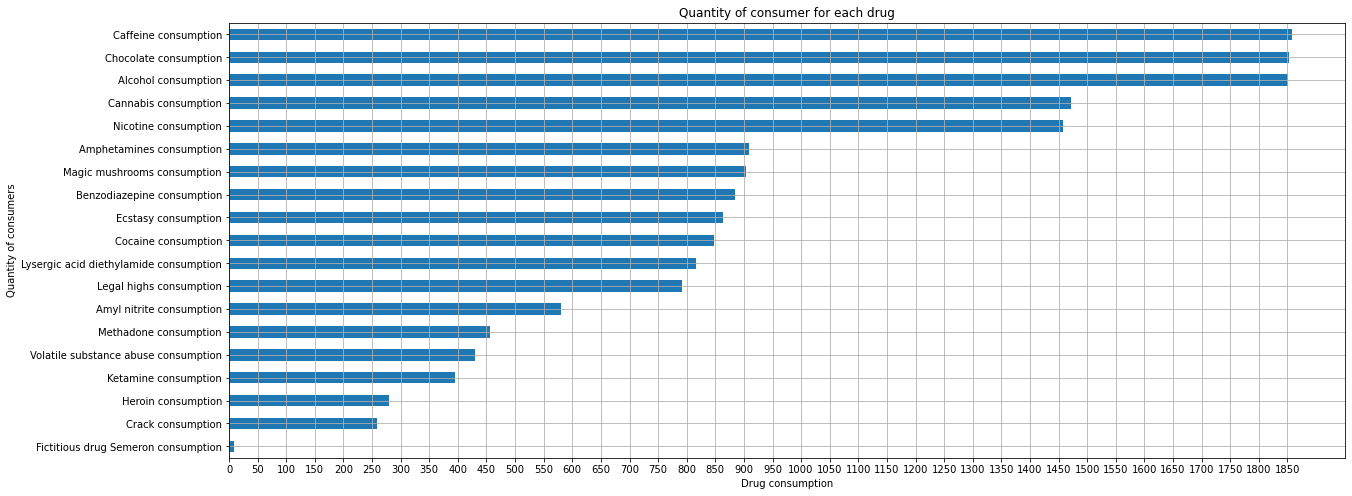

In [398]:
ax = df_consumers.plot.barh(figsize=(20,8), 
                            title='Quantity of consumer for each drug',
                            grid=True)
ax.set_xlabel('Drug consumption')
ax.set_ylabel('Quantity of consumers')
ax.set_xticks(range(0,1900,50))
plt.show()

Here we can see the Semeron consumers represent a very few part of the participants (only 8 over 1885).

In fact, Semeron is a fictitious drug. It means these 8 participants lied about their consumption. We can remove them from the dataset

In [399]:
df = df[df['Fictitious drug Semeron consumption'] == 0]
drugs.remove('Fictitious drug Semeron consumption')
df.drop(columns='Fictitious drug Semeron consumption', inplace=True)
r,c = df.shape
print(f'Now we have {r} rows and {c} columns')

Now we have 1877 rows and 30 columns


### Creating DataFrame with informations

Let's see the repartition of the features datas (demographic and personality datas) with boxplots to understand the numerical values we have.

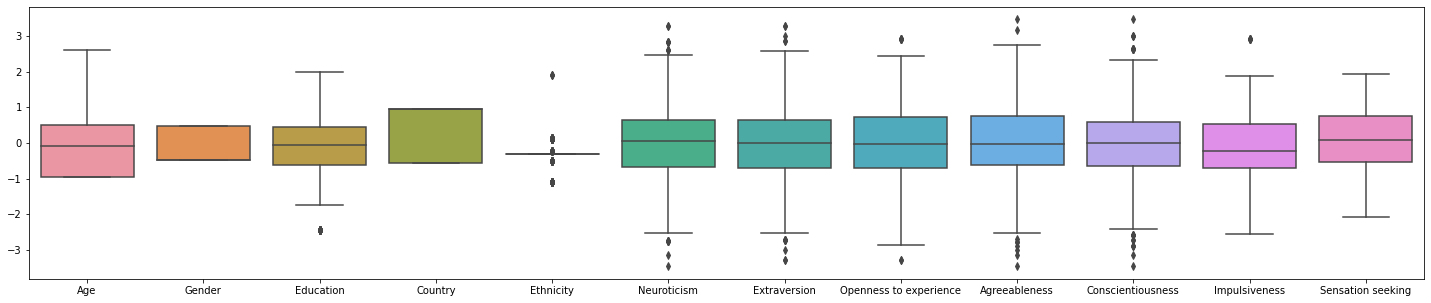

In [400]:
features = demographic + personality
plt.figure(figsize=(25,5))
sns.boxplot(data = df[features])
plt.show()

With the boxplot, we remark all the values for all features columns are centered to 0. It means datas have been scaled before. We also see the repartition of ethnicity is very unbalanced : we will see more about it later.

It will be useful for applying machine learning models in a next part. But for the analysis, we need to get the categories and not real numerical values.

So let's create a new dataframe with categorical values for features columns

In [401]:
age_cat = ['18-24' if x == -0.95197 else 
           '25-34' if x == -0.07854 else 
           '35-44' if x == 0.49788 else 
           '45-54' if x == 1.09449 else 
           '55-64' if x == 1.82213 else 
           '65+' for x in df['Age']]

gender_cat = ['Female' if x > 0 else "Male" for x in df['Gender']]

education_cat = ['Left school before 16 years' if x == -2.43591 else 
                 'Left school at 16 years' if x == -1.73790 else 
                 'Left school at 17 years' if x == -1.43719 else 
                 'Left school at 18 years' if x == -1.22751 else 
                 'Some college or university, no certificate or degree' if x == -0.61113 else 
                 'Professional certificate/ diploma' if x == -0.05921 else 
                 'University degree' if x == 0.45468 else 
                 'Masters degree' if x == 1.16365 else 
                 'Doctorate degree' for x in df['Education']]

country_cat = ['Australia' if x == -0.09765 else 
               'Canada' if x == 0.24923 else 
               'New Zealand' if x == -0.46841 else 
               'Other' if x == -0.28519 else 
               'Republic of Ireland' if x == 0.21128 else 
               'UK' if x == 0.96082 else 
               'USA' for x in df['Country']]

ethnicity_cat = ['Asian' if x == -0.50212 else 
                 'Black' if x == -1.10702 else 
                 'Mixed-Black/Asian' if x == 1.90725 else 
                 'Mixed-White/Asian' if x == 0.12600 else 
                 'Mixed-White/Black' if x == -0.22166 else 
                 'Other' if x == 0.11440 else 
                 'White' for x in df['Ethnicity']]

df_demo = pd.DataFrame(index=df.index)
df_demo['Age'] = age_cat
df_demo['Gender'] = gender_cat
df_demo['Education'] = education_cat
df_demo['Country'] = country_cat
df_demo['Ethnicity'] = ethnicity_cat
df_demo.head(10)

Age  Gender                          Education Country  \
ID                                                             
1   35-44  Female  Professional certificate/ diploma      UK   
2   25-34    Male                   Doctorate degree      UK   
3   35-44    Male  Professional certificate/ diploma      UK   
4   18-24  Female                     Masters degree      UK   
5   35-44  Female                   Doctorate degree      UK   
6     65+  Female            Left school at 18 years  Canada   
7   45-54    Male                     Masters degree     USA   
8   35-44    Male            Left school at 16 years      UK   
9   35-44  Female  Professional certificate/ diploma  Canada   
10  55-64    Male                     Masters degree      UK   

            Ethnicity  
ID                     
1   Mixed-White/Asian  
2               White  
3               White  
4               White  
5               White  
6               White  
7               White  
8               White  
9               White  
10              White

In [402]:
def frequency_plots(df_toplot):
    plt.rc('font', size=30)
    colors = sns.color_palette('pastel')
        
    nb_plots = len(df_toplot.columns)
    
    nrows, ncols = nb_plots, 2
    fig,axes = plt.subplots(nrows,ncols, figsize = (15*ncols,15*nrows))
    plt.subplots_adjust(wspace=0.1, hspace=1.2)
    
    
    fig.suptitle("Frequency pie / bar plots")
    i = 0
    for col in df_toplot.columns:
        df_toplot[col].value_counts().sort_index().plot.pie(colors = colors, 
                                                             autopct='%.2f%%', 
                                                             ax=axes[i,0] if nb_plots > 2 else 
                                                               None if nb_plots == 1
                                                               else axes[i], 
                                                             title=col,
                                                             ylabel='')
        df_toplot[col].value_counts().sort_index().plot.bar(color = colors, 
                                                             ax=axes[i,1] if nb_plots > 2 else 
                                                             None if nb_plots == 1
                                                             else axes[i], 
                                                             title=col)
        i += 1
    
    #if nb_plots > 1 and nb_plots % 2 == 1:
    #    axes[len(axes)-1,1].axis('Off')

In [403]:
def plot_and_table(df_toplot, col):
    plt.rc('font', size=10)
    colors = sns.color_palette('pastel')
    fig,axes = plt.subplots(1,2, figsize=(20,5))
    df_toplot[col].value_counts().sort_index().plot.pie(colors = colors, 
                                             ax=axes[0],
                                             title=f'Frequency of {col}',
                                             autopct='%.2f%%',
                                             ylabel='')
    df_toplot[col].value_counts().sort_index().plot.bar(color = colors, 
                                             ax=axes[1],
                                             title=f'Quantity of {col}',
                                             ylabel='')
    plt.show()
    
    tab = pd.DataFrame(index = df_toplot[col].value_counts().index)
    tab['Quantity'] = df_toplot[col].value_counts()
    tab['Frequency (%)'] = round(df_toplot[col].value_counts() * 100 / len(df_demo),2).apply(lambda x : f'{x}%')
    return tab
    

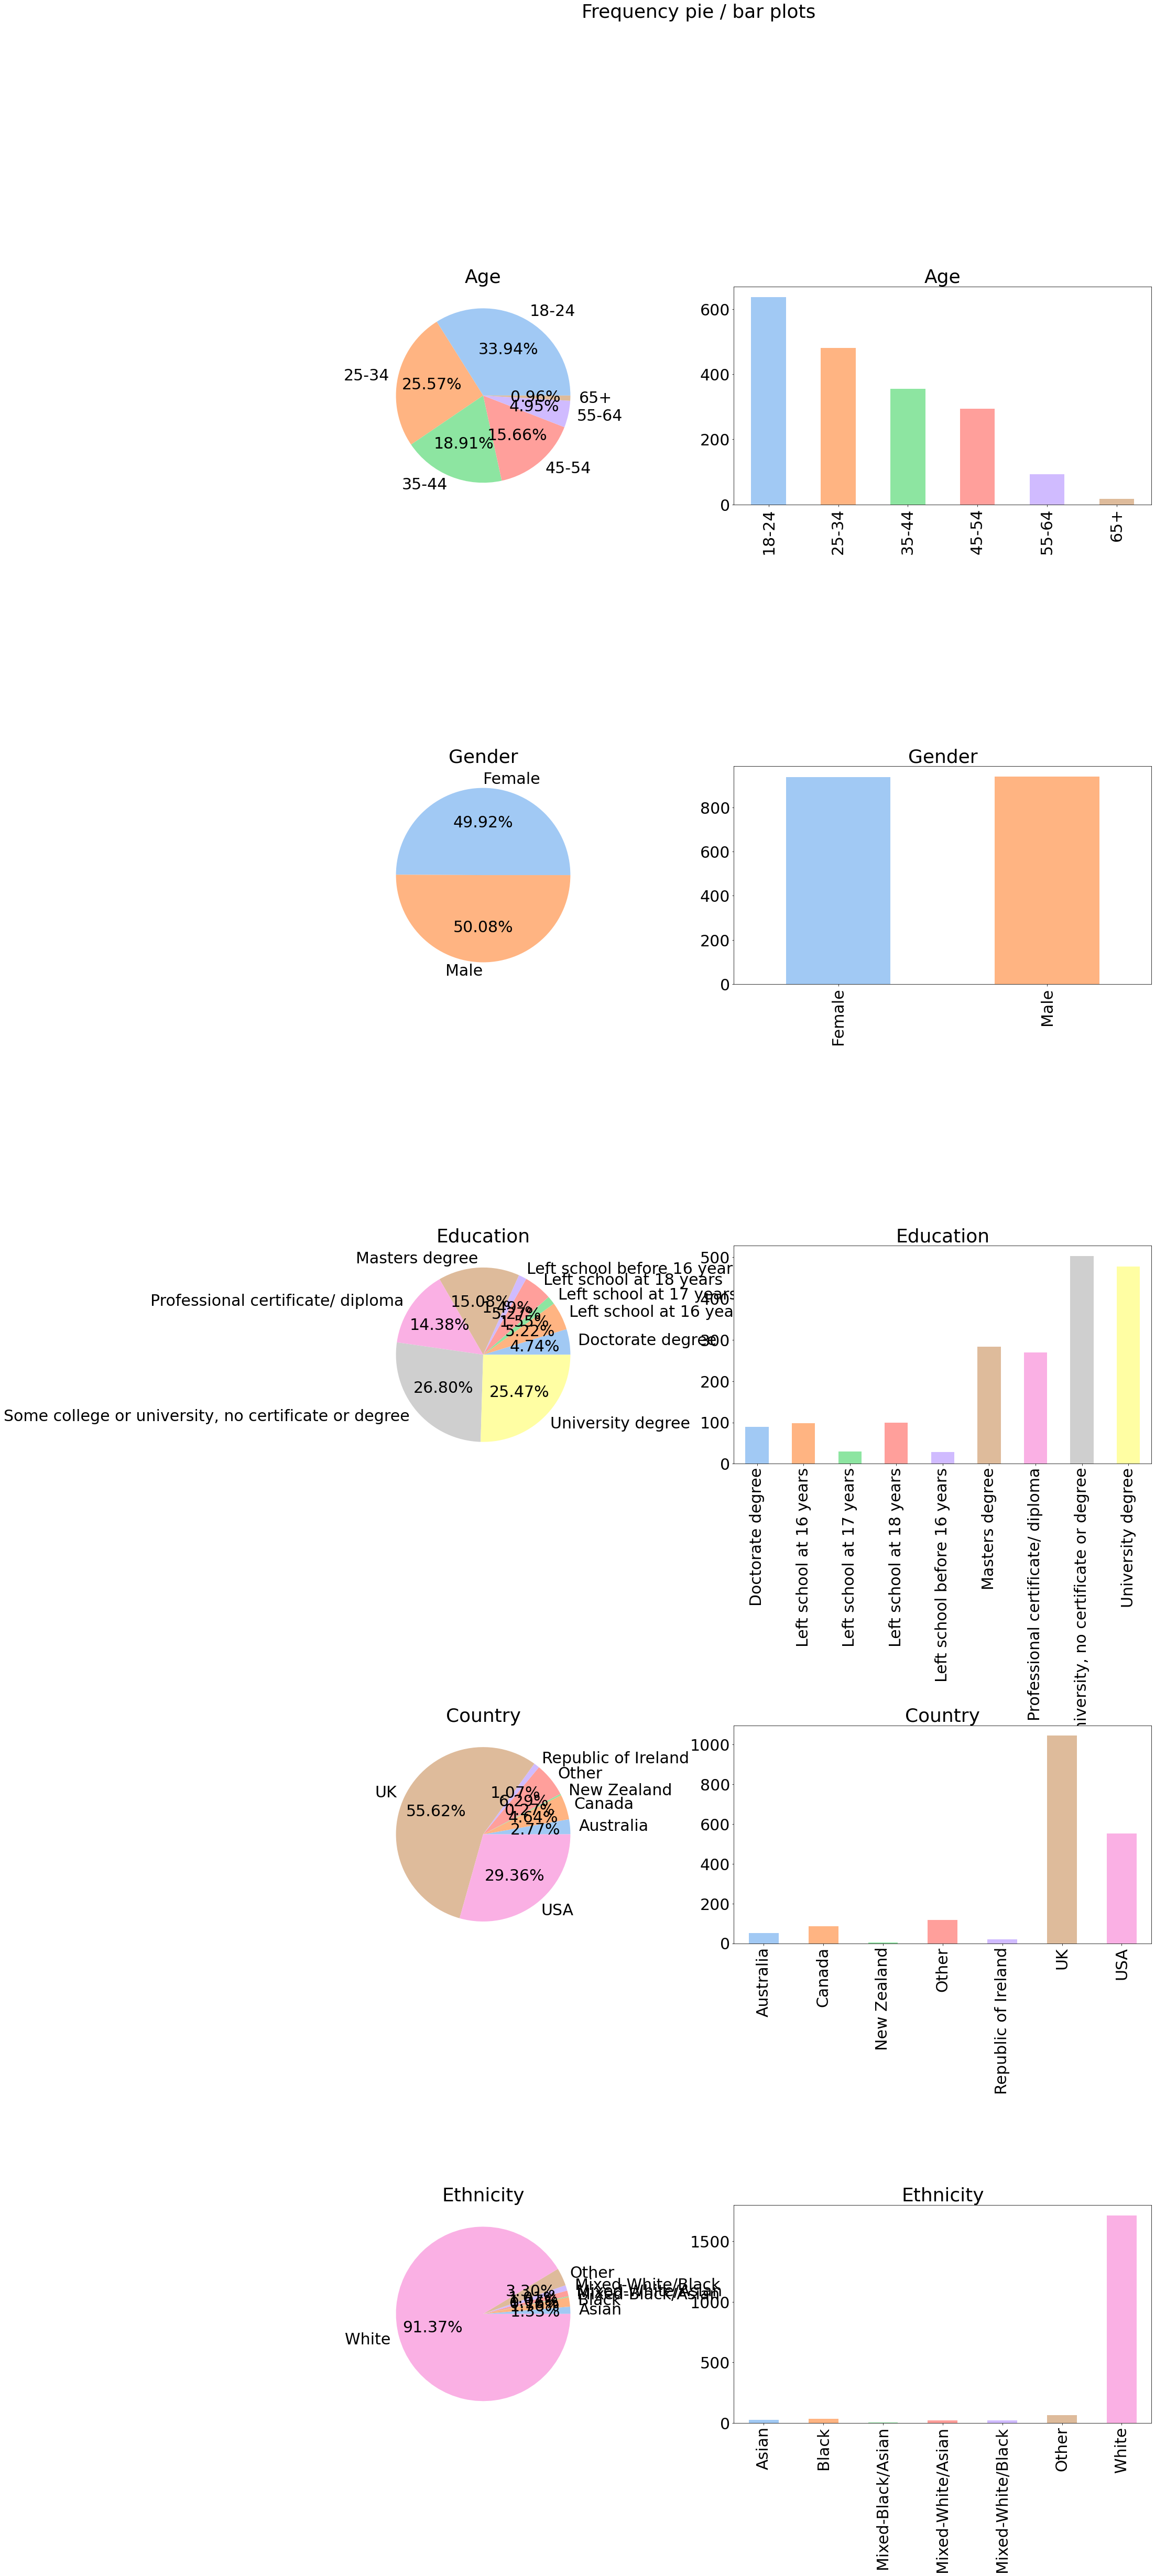

In [404]:
frequency_plots(df_demo)

In those plots, we can see many things for each demographic column :
* Age : There are more young participants than old. The more the age increase, the more the number of participants decrease. People who have more than 55 years old are not well represented (less than 1% for +65yo and less than 5% for 55-64yo), and people between 18 and 24 yo represents 34% of the participants. The age is not very representative in this dataset

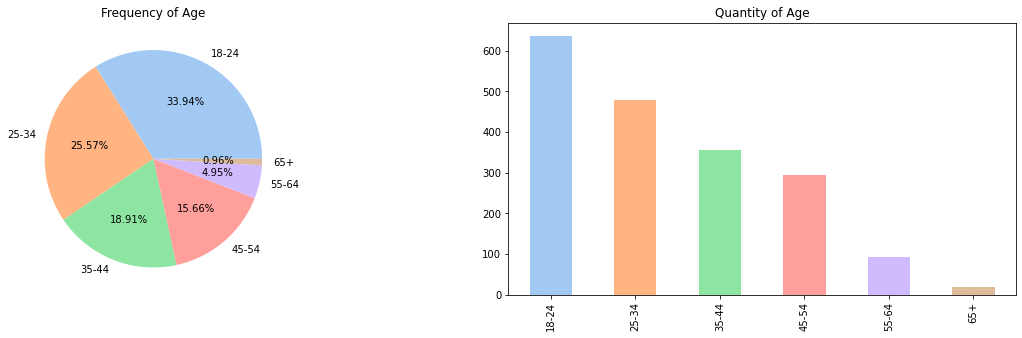

Quantity Frequency (%)
18-24       637        33.94%
25-34       480        25.57%
35-44       355        18.91%
45-54       294        15.66%
55-64        93         4.95%
65+          18         0.96%

In [405]:
plot_and_table(df_demo, 'Age')

* Gender : There is almost 50% of each category (Male or Female), which is very representative

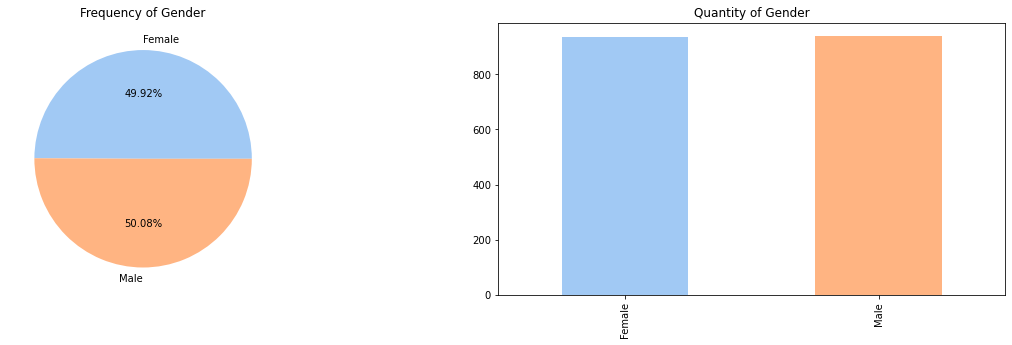

Quantity Frequency (%)
Male         940        50.08%
Female       937        49.92%

In [406]:
plot_and_table(df_demo, 'Gender')

* Education : Almost 90% of the dataset are educated (didn't left school). It's not very balanced, but might be close to real proportions of the reality in countries where the participants live. 

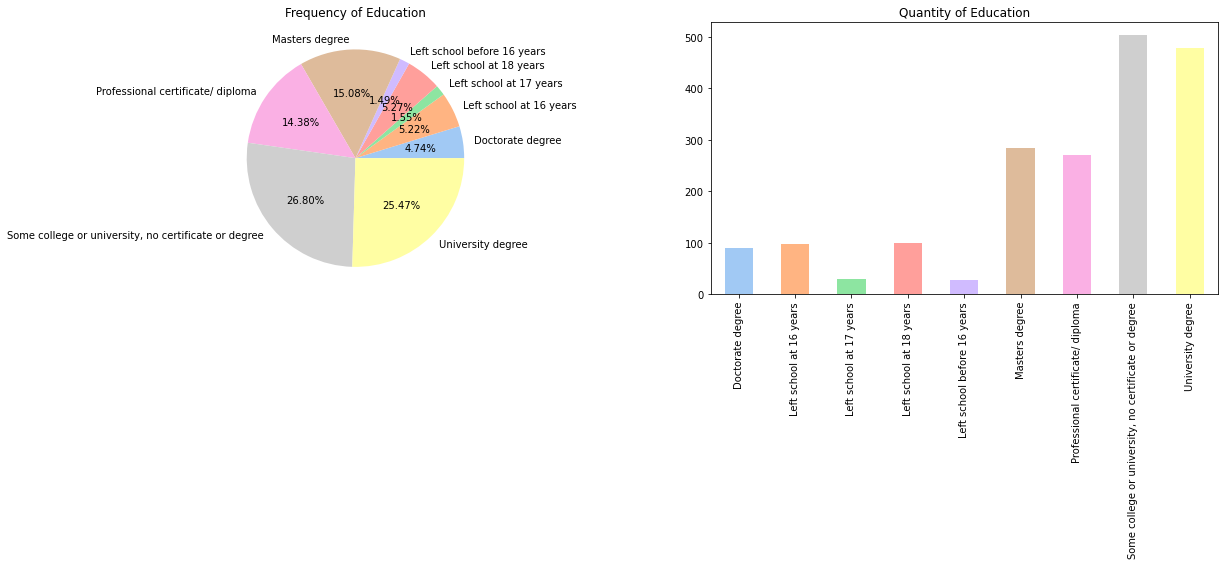

Quantity Frequency (%)
Some college or university, no certificate or d...       503         26.8%
University degree                                        478        25.47%
Masters degree                                           283        15.08%
Professional certificate/ diploma                        270        14.38%
Left school at 18 years                                   99         5.27%
Left school at 16 years                                   98         5.22%
Doctorate degree                                          89         4.74%
Left school at 17 years                                   29         1.55%
Left school before 16 years                               28         1.49%

In [407]:
plot_and_table(df_demo, 'Education')

* Country : Unbalanced and not representative : UK represents more than 50% of participants, and 85% of participants are from UK or USA.

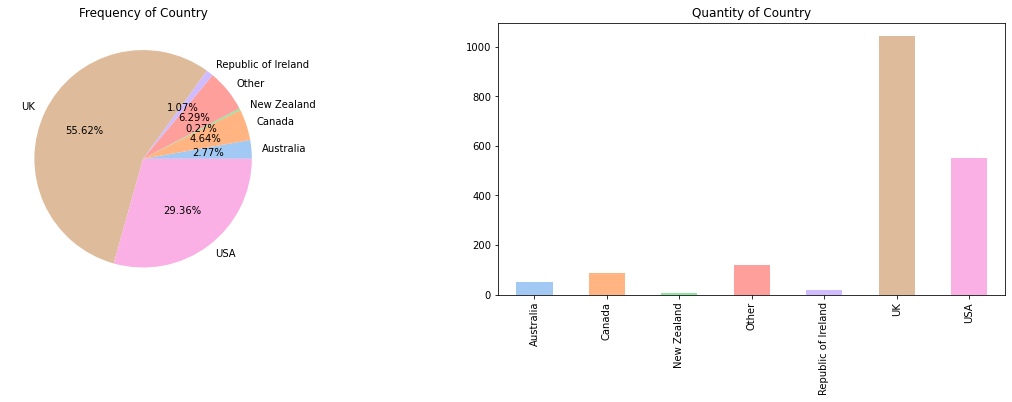

Quantity Frequency (%)
UK                       1044        55.62%
USA                       551        29.36%
Other                     118         6.29%
Canada                     87         4.64%
Australia                  52         2.77%
Republic of Ireland        20         1.07%
New Zealand                 5         0.27%

In [408]:
plot_and_table(df_demo, 'Country')

* Ethnicity : Here we can see the ethnicity is not representative at all : more than 90% of participants are white 

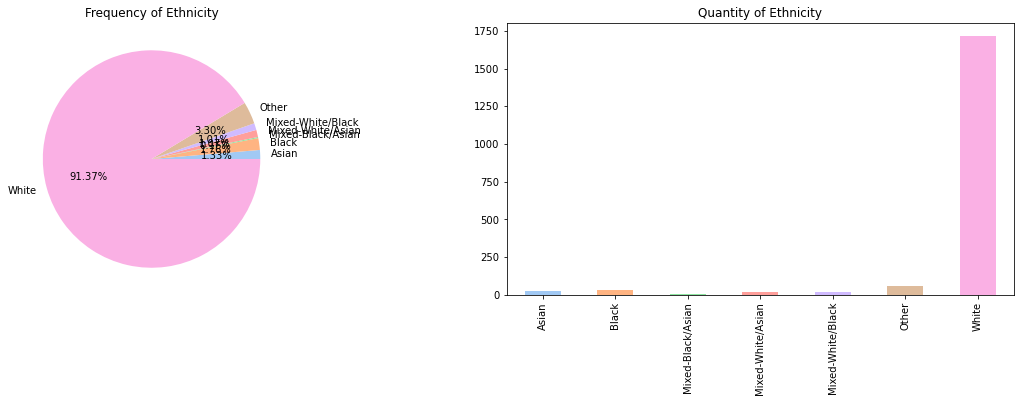

Quantity Frequency (%)
White                  1715        91.37%
Other                    62          3.3%
Black                    33         1.76%
Asian                    25         1.33%
Mixed-White/Asian        20         1.07%
Mixed-White/Black        19         1.01%
Mixed-Black/Asian         3         0.16%

In [409]:
plot_and_table(df_demo, 'Ethnicity')

### Analysis drug consumption

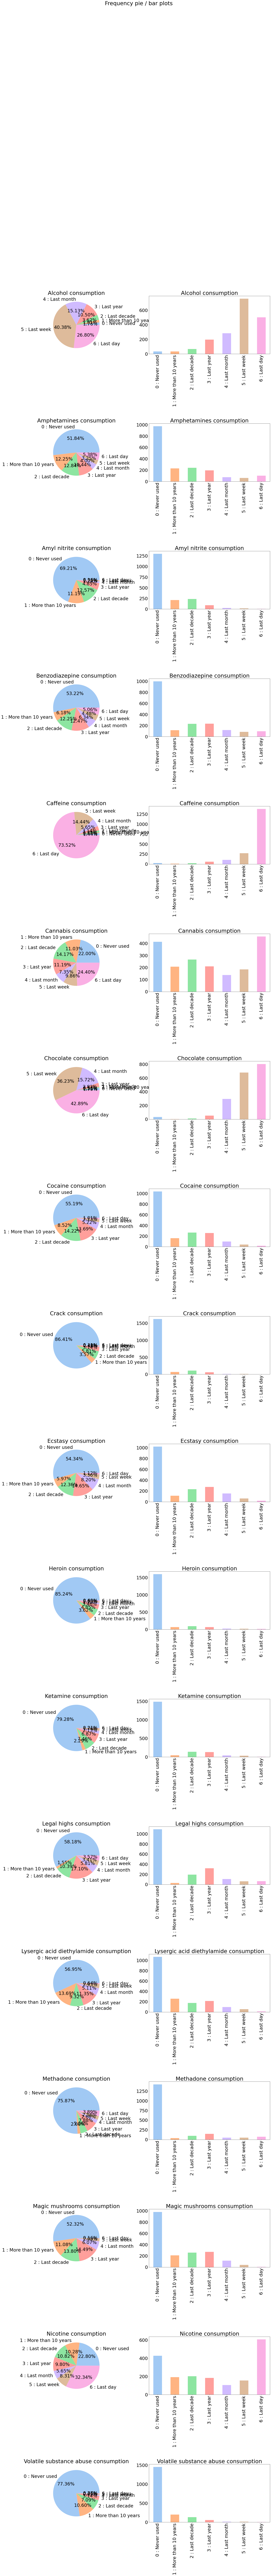

In [410]:
definitions = ['Never used', 'More than 10 years','Last decade', 'Last year', 'Last month', 'Last week', 'Last day']
df_drugs = df[drugs].applymap(lambda i : str(i) + ' : ' + definitions[i])
frequency_plots(df_drugs)

We can see that, some drugs are not consumed by more than 50% of the participants, while some others like alcohol or canabis are as well consumed by people than not consumed, and other legal drugs like caffein or chocolate are consumed by almost every participants.

We won't analyse each case in this section but we can see some of them

* Alcohol : The most important part of participants drank alcohol within the last week, and minus than 2% never taste it.

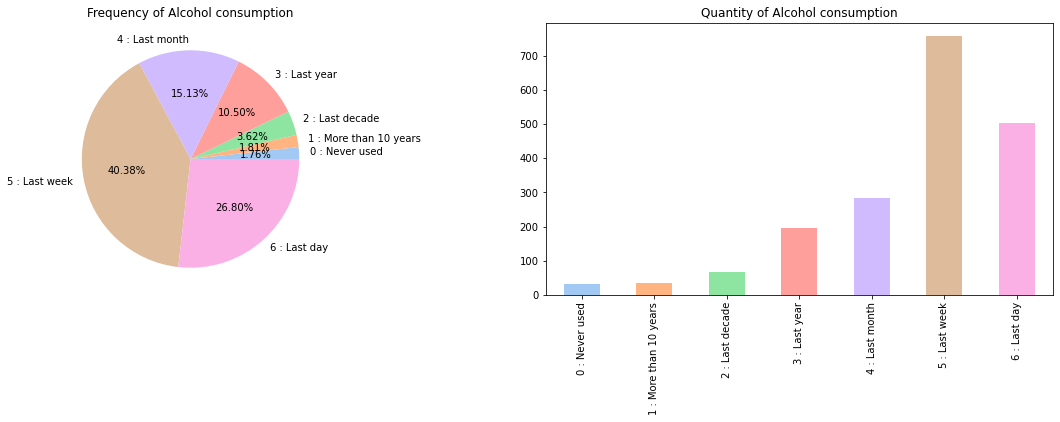

Quantity Frequency (%)
5 : Last week                758        40.38%
6 : Last day                 503         26.8%
4 : Last month               284        15.13%
3 : Last year                197         10.5%
2 : Last decade               68         3.62%
1 : More than 10 years        34         1.81%
0 : Never used                33         1.76%

In [411]:
plot_and_table(df_drugs, 'Alcohol consumption')

* Caffeine : Almost 3 participants over 4 are consuming caffeine every days, and almots 95% every months

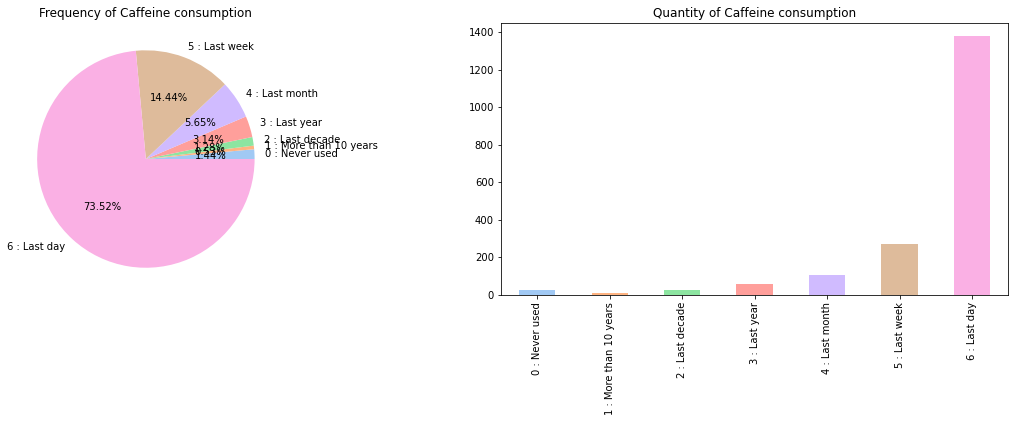

Quantity Frequency (%)
6 : Last day                1380        73.52%
5 : Last week                271        14.44%
4 : Last month               106         5.65%
3 : Last year                 59         3.14%
0 : Never used                27         1.44%
2 : Last decade               24         1.28%
1 : More than 10 years        10         0.53%

In [412]:
plot_and_table(df_drugs, 'Caffeine consumption')

* Chocolate : Almost 80% of participants are consuming chocolate at least every week, but the chocolate seems less addictive than caffeine since only 43% of them consumes it last day, againts 75% for the caffeine.

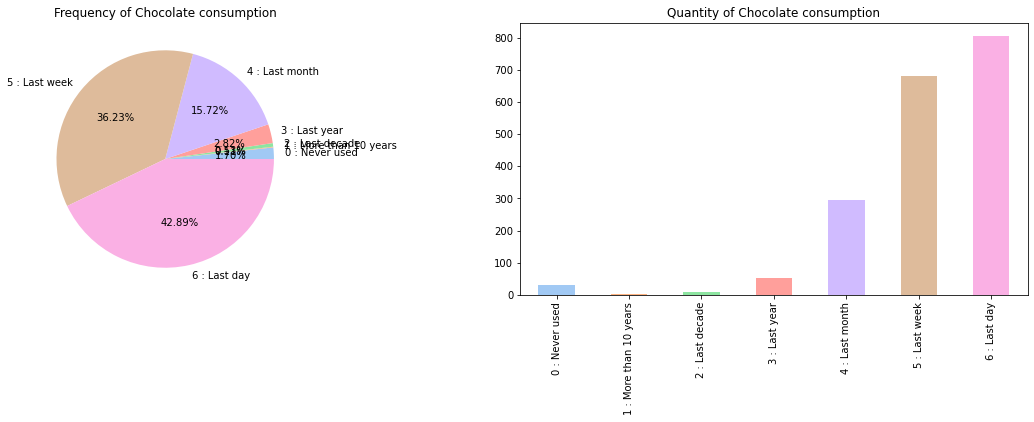

Quantity Frequency (%)
6 : Last day                 805        42.89%
5 : Last week                680        36.23%
4 : Last month               295        15.72%
3 : Last year                 53         2.82%
0 : Never used                32          1.7%
2 : Last decade               10         0.53%
1 : More than 10 years         2         0.11%

In [413]:
plot_and_table(df_drugs, 'Chocolate consumption')

* Cannabis : For that illegal drug (depending on the country / state), it's a drug that most people use each day (24%) or never used before (22%), and the others categories of frequency are like balanced (~10% for each)

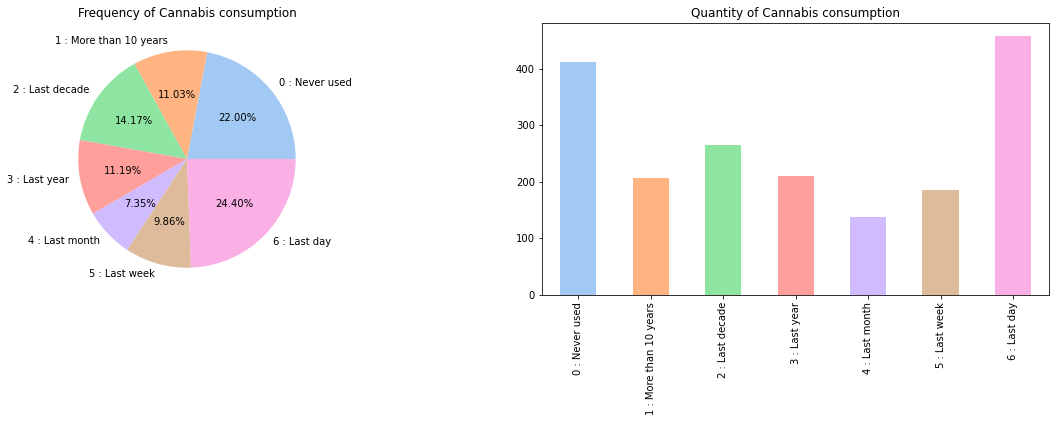

Quantity Frequency (%)
6 : Last day                 458         24.4%
0 : Never used               413         22.0%
2 : Last decade              266        14.17%
3 : Last year                210        11.19%
1 : More than 10 years       207        11.03%
5 : Last week                185         9.86%
4 : Last month               138         7.35%

In [414]:
plot_and_table(df_drugs, 'Cannabis consumption')

* Nicotine : Here we can see how nicotine can be addictive when we start consuming it : The majority of participants who already consumed it are consuming it every day, although 23% of participants never used. We can suppose that the 20% of participants who didn't consumed nicotine during last decade or more than 10 years are people who reached to stop consuming nicoting a few years ago.

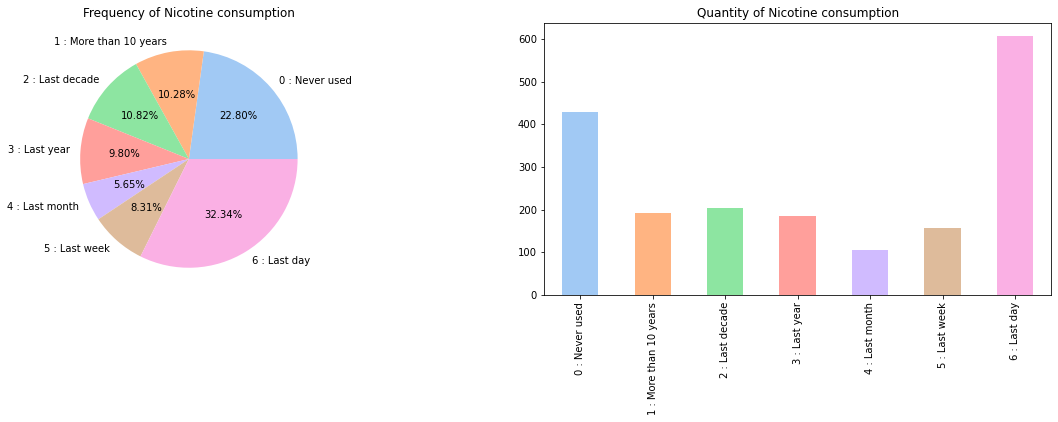

Quantity Frequency (%)
6 : Last day                 607        32.34%
0 : Never used               428         22.8%
2 : Last decade              203        10.82%
1 : More than 10 years       193        10.28%
3 : Last year                184          9.8%
5 : Last week                156         8.31%
4 : Last month               106         5.65%

In [415]:
plot_and_table(df_drugs, 'Nicotine consumption')

## Prediction models
### Correlation between all variables

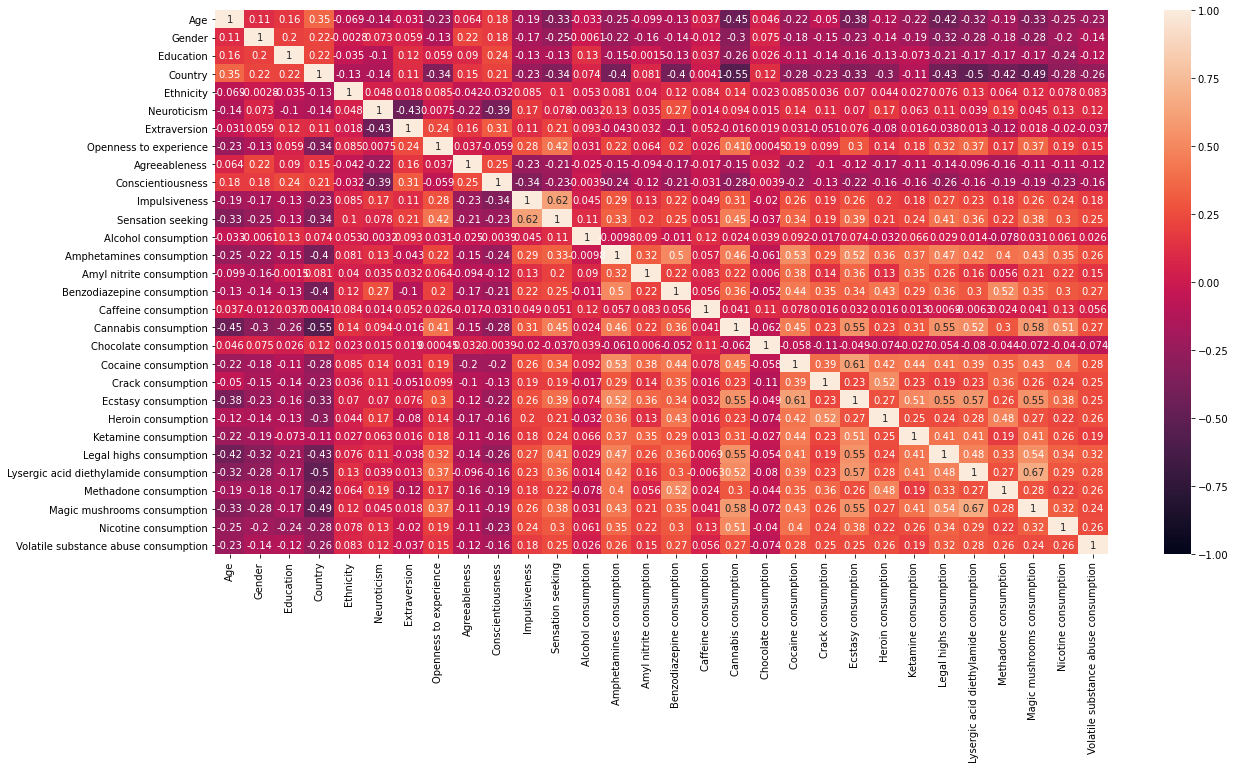

In [416]:
plt.figure(figsize=(20,10))
plt.rc('font', size=10)
sns.heatmap(df.corr(), annot=True, vmin=-1)
plt.show()

Values that interests us are correlation between drug consumption and other features.

Demographic features seems to have negative correlation while some personality traits seems to have positive correlation like 'openess to experience', 'impulsiveness', or 'sensation seeking'.

But the most important correlations are between 2 drugs : for example, correlation between Cocaïne and Ecstasy is 0.62.
We can also see a correlation between some drugs and the country, for example, correlation between Country and Canabis, Magic Murshrooms or Lysergic acid consumption are around -0.5.

### Prediction within 6 classes
We will first try to predict the consumption of people within the 6 classes that exists : Never used, last used more than 10 years, etc. The classes are ordinates so we could try a regression model and then rounding it, but the more logical t do is a classifier, so let's try 2 classifier models for now, and try to predict the cannabis consumption

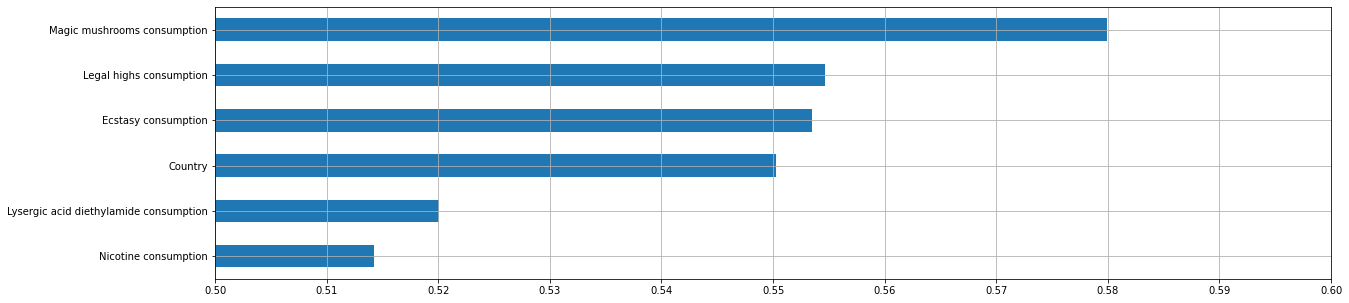

In [417]:
cannabis_corr = df.corr()['Cannabis consumption']
filt = cannabis_corr.apply(lambda x : abs(x) > 0.5 and x != 1)
abs(cannabis_corr[filt]).sort_values().plot.barh(figsize=(20,5), xlim=(0.5,0.6), 
                                                    xticks=np.linspace(0.5,0.6,11),
                                                   grid=True)
plt.show()

We are not going to use all of the columns. In this plot we can see the most correlated columns with cannabis consumption (for which the absolute correlation is more than 0.5). So we are selecting those columns as features for our model.

In [418]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from random import random

In [419]:
def test_algo(X_train,y_train,algo,params={}):
    grid       = GridSearchCV(algo, params, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(str(algo)[:-2], 'fitted, with score :', grid.best_score_)
    return grid.best_score_, grid.best_estimator_

In [420]:
def classifiers_test(algos,X_train,y_train):
    grids = []
    for a,p in algos.items():
        grids.append(test_algo(X_train,y_train,a,p))
    return grids

In [421]:
def disp_scores(grids,X_test,y_test):
    nrows, ncols = len(grids),2
    fig,axes=plt.subplots(nrows,ncols, figsize=(ncols*5,nrows*5))
    i=0
    for score, est in sorted(grids, key=lambda x:x[0]):
        y_pred = est.predict(X_test)
        axes[i,0].set_title(str(est) + '\nConfusion Matrix')
        sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, fmt='.0f', cmap='Greens',ax=axes[i,0])
        axes[i,1].set_title('Score : \n' + str(score))
        axes[i,1].pie([score, 1-score], labels = ['success','fail'], autopct = '%.2f%%')
        i += 1

Let's define some algorithms without parameters first

In [422]:
algos = { KNeighborsClassifier() : {},
         SVC() : {},
         LogisticRegression() : {},
         RidgeClassifier() : {},
         RandomForestClassifier() : {},
         BaggingClassifier() : {},
         GradientBoostingClassifier() : {},
         GaussianNB() : {}         
        }

KNeighborsClassifier fitted, with score : 0.4029857903636961
SVC fitted, with score : 0.4882789429847808


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression fitted, with score : 0.45556144468842275
RidgeClassifier fitted, with score : 0.45204058453850227
RandomForestClassifier fitted, with score : 0.49183009010373285
BaggingClassifier fitted, with score : 0.4349738774892103
GradientBoostingClassifier fitted, with score : 0.4719340753640746
GaussianNB fitted, with score : 0.4136190404078645


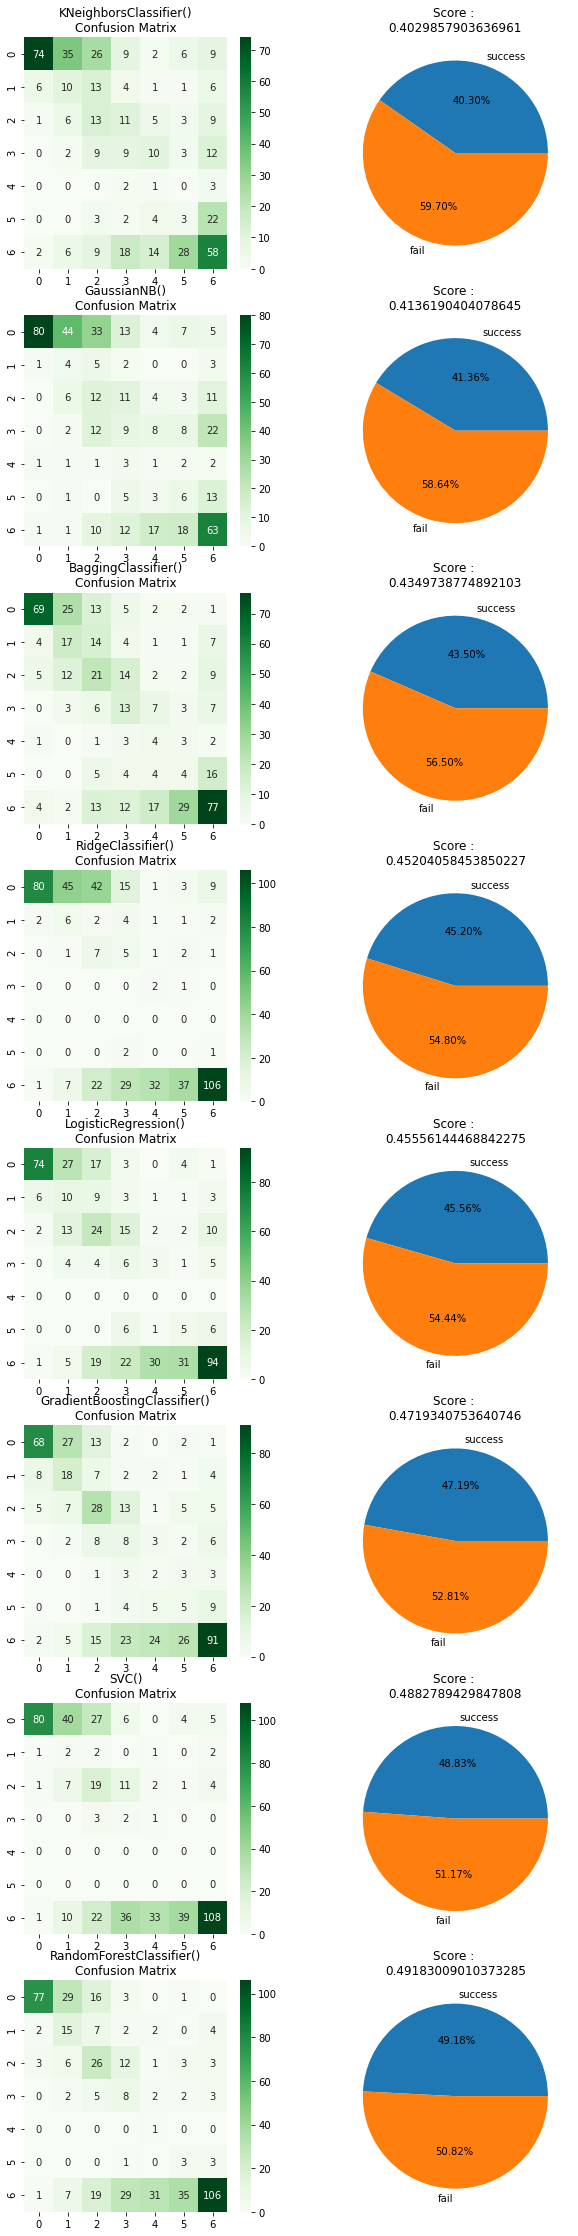

In [423]:
X, y = df[[c for c in df.columns if c != 'Cannabis consumption']], df['Cannabis consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

grids = classifiers_test(algos,X_train,y_train)
disp_scores(grids,X_test,y_test)

KNeighborsClassifier fitted, with score : 0.29565129602988316
SVC fitted, with score : 0.3873577143434038
LogisticRegression fitted, with score : 0.37811514096060167
RidgeClassifier fitted, with score : 0.3802428005350698
RandomForestClassifier fitted, with score : 0.3006360263496631
BaggingClassifier fitted, with score : 0.2821433078418011
GradientBoostingClassifier fitted, with score : 0.35107140152949196
GaussianNB fitted, with score : 0.37953610459099973


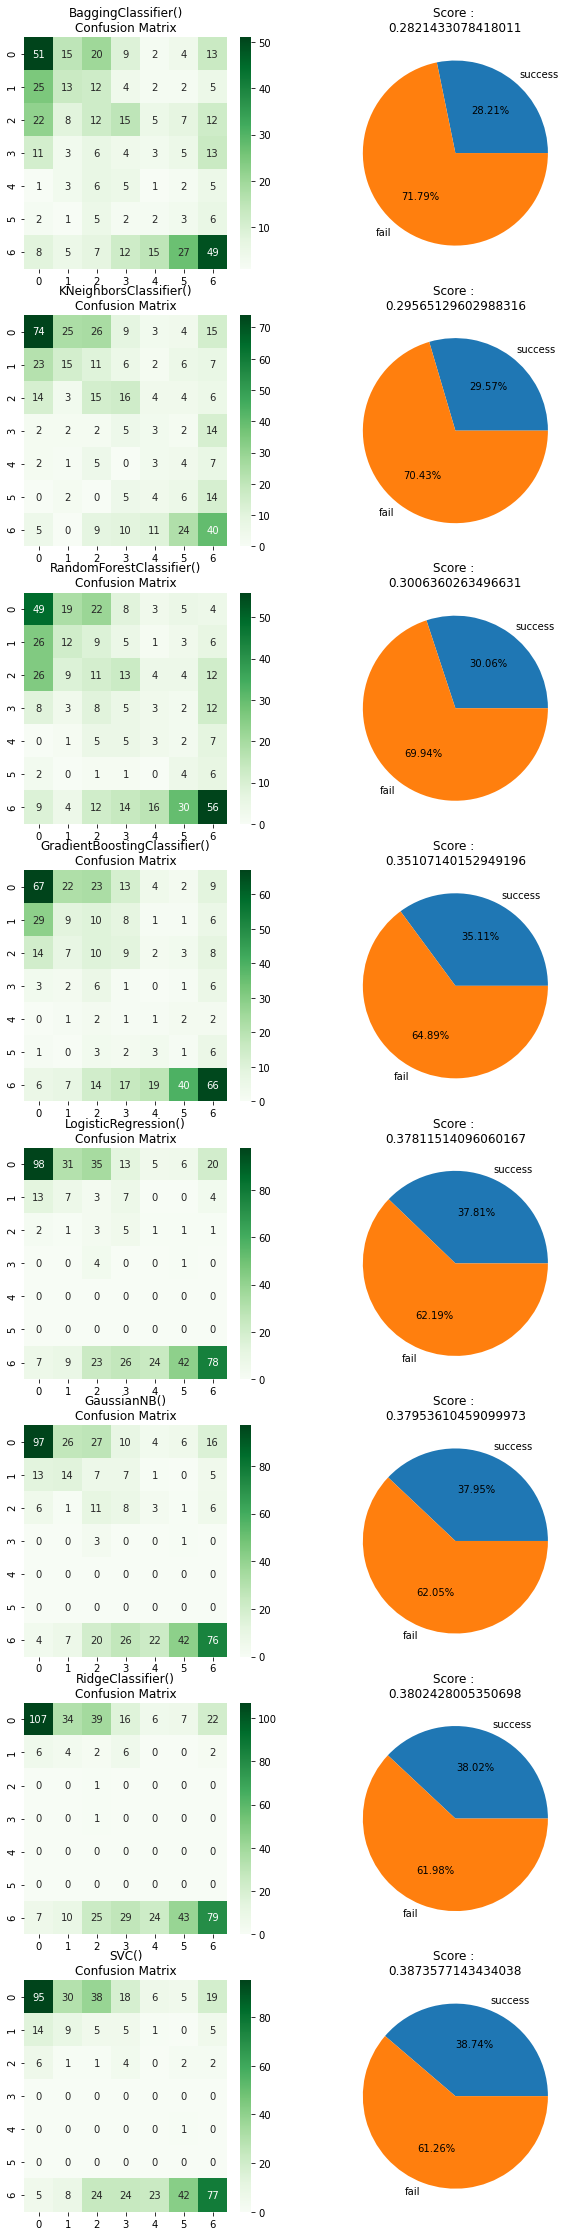

In [424]:
cannabis_corr = df_corr['Cannabis consumption'].apply(abs).sort_values(ascending=False)
cols = cannabis_corr.index[cannabis_corr.index.map(lambda x : x not in drugs)][1:6]
X, y = df[cols], df['Cannabis consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
grids = classifiers_test(algos,X_train,y_train)
disp_scores(grids,X_test,y_test)

Here we see that the score prediction is not satisfying... We do not even have 50% of success.
Most of the results seems to have been classified "Never used" or "Used last day" by each algorithms, using all the features or relevant features.

### Prediction between 2 classes
Let's now consider someone who used a drug last day or last week as a consumer of this drug, and if he didn't used since more than last week, we can suppose the participant only tried once, or was a consumer before and stopped, for example.

For that, we can say that CL0 to CL4 is a class 0, which means 'Non consumer', and CL5-CL6 is a class 1, meaning 'Consumer'.

In [480]:
Y_drugs = df[drugs].applymap(lambda x : 0 if x < 2 else 1)
Y_drugs.head()

Alcohol consumption  Amphetamines consumption  Amyl nitrite consumption  \
ID                                                                            
1                     1                         1                         0   
2                     1                         1                         1   
3                     1                         0                         0   
4                     1                         0                         0   
5                     1                         0                         0   

    Benzodiazepine consumption  Caffeine consumption  Cannabis consumption  \
ID                                                                           
1                            1                     1                     0   
2                            0                     1                     1   
3                            0                     1                     1   
4                            1                     1                     1   
5                            0                     1                     1   

    Chocolate consumption  Cocaine consumption  Crack consumption  \
ID                                                                  
1                       1                    0                  0   
2                       1                    1                  0   
3                       1                    0                  0   
4                       1                    1                  0   
5                       1                    0                  0   

    Ecstasy consumption  Heroin consumption  Ketamine consumption  \
ID                                                                  
1                     0                   0                     0   
2                     1                   0                     1   
3                     0                   0                     0   
4                     0                   0                     1   
5                     0                   0                     0   

    Legal highs consumption  Lysergic acid diethylamide consumption  \
ID                                                                    
1                         0                                       0   
2                         0                                       1   
3                         0                                       0   
4                         0                                       0   
5                         0                                       0   

    Methadone consumption  Magic mushrooms consumption  Nicotine consumption  \
ID                                                                             
1                       0                            0                     1   
2                       1                            0                     1   
3                       0                            0                     0   
4                       0                            0                     1   
5                       0                            1                     1   

    Volatile substance abuse consumption  
ID                                        
1                                      0  
2                                      0  
3                                      0  
4                                      0  
5                                      0

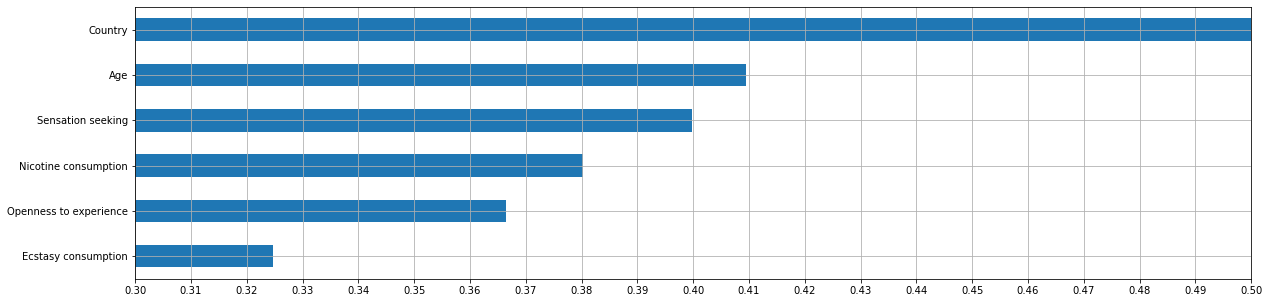

In [426]:
cannabis_corr = df_corr['Cannabis consumption']
filt = cannabis_corr.apply(lambda x : abs(x) > 0.3 and x != 1)
abs(cannabis_corr[filt]).sort_values().plot.barh(figsize=(20,5), xlim=(0.3,0.5), 
                                                    xticks=np.linspace(0.3,0.5,21),
                                                   grid=True)
plt.show()

These columns are the 5 most correlated features with cannabis consumption

KNeighborsClassifier fitted, with score : 0.7959995961737463
SVC fitted, with score : 0.8287120466419324


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression fitted, with score : 0.8194619015168725
RidgeClassifier fitted, with score : 0.8244466318366523
RandomForestClassifier fitted, with score : 0.8258600237247924
BaggingClassifier fitted, with score : 0.7995633628631282
GradientBoostingClassifier fitted, with score : 0.8265616718406905
GaussianNB fitted, with score : 0.7945735847151763


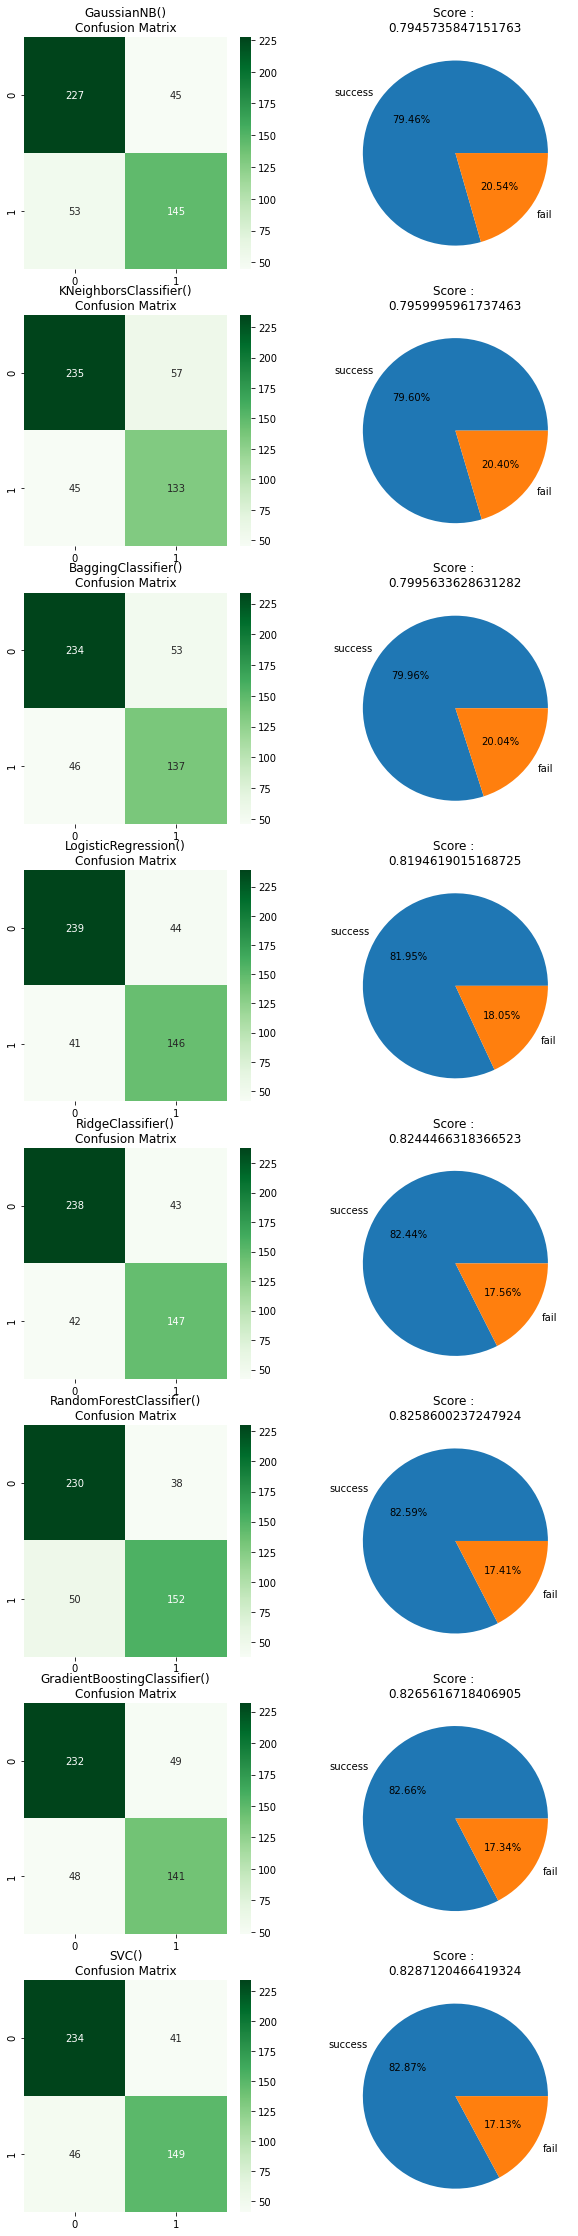

In [427]:
X, y = df[[c for c in df.columns if c != 'Cannabis consumption']], Y_drugs['Cannabis consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

grids = classifiers_test(algos,X_train,y_train)
disp_scores(grids,X_test,y_test)

KNeighborsClassifier fitted, with score : 0.7483783851997678
SVC fitted, with score : 0.784636934958734
LogisticRegression fitted, with score : 0.7853461548168901
RidgeClassifier fitted, with score : 0.783221019156508
RandomForestClassifier fitted, with score : 0.7419954064763636
BaggingClassifier fitted, with score : 0.7370232957270134
GradientBoostingClassifier fitted, with score : 0.7782489084071578
GaussianNB fitted, with score : 0.7817899598697661


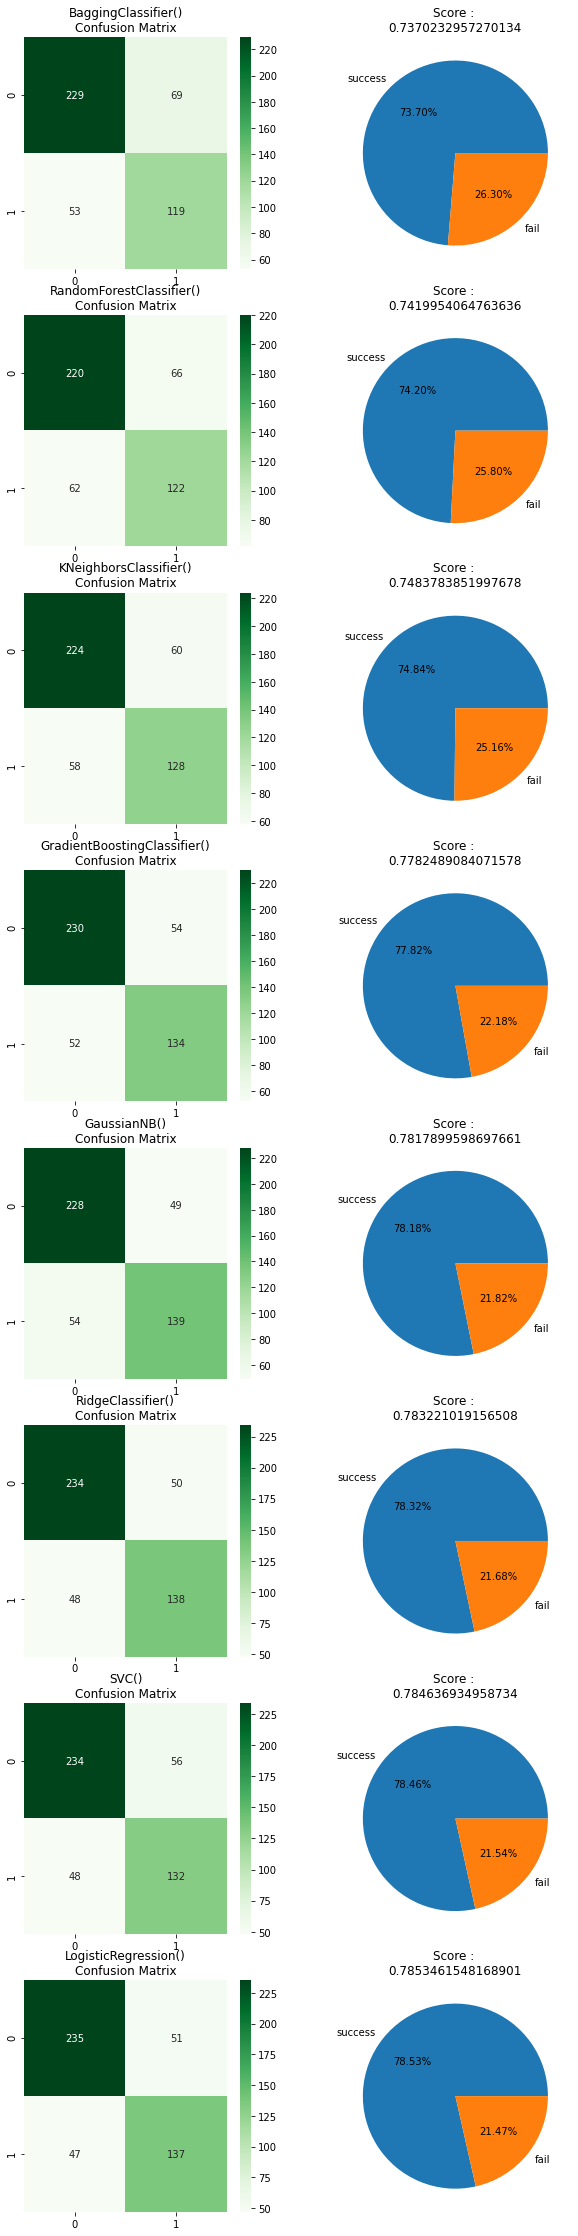

In [428]:
cannabis_corr = df_corr['Cannabis consumption'].apply(abs).sort_values(ascending=False)
cols = cannabis_corr.index[cannabis_corr.index.map(lambda x : x not in drugs)][1:6]
X, y = df[cols], Y_drugs['Cannabis consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
grids = classifiers_test(algos,X_train,y_train)
disp_scores(grids,X_test,y_test)

Using the same classifiers, results are better, we have around 77% of success.

But let's have more than that, using other algos or parameters.

In [452]:
algos = { 
    KNeighborsClassifier() : {
        'n_neighbors' : range(1,20),
        'algorithm' : ['ball_tree', 'kd_tree'],
        'metric' : ['euclidean','manhattan','chebyshev','minkowski'] },
    
    SVC() : { 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'C' : np.linspace(0.1,1,10) },
    
    LogisticRegression() : { 
        'C' : np.linspace(0.1,1,10),
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    
    RidgeClassifier() : {'alpha' : np.linspace(0.5,5,10),
                         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    
    GaussianNB() : {}    
}

KNeighborsClassifier fitted, with score : 0.7641395348837209
SVC fitted, with score : 0.7668084163898118
LogisticRegression fitted, with score : 0.7621439645625692
RidgeClassifier fitted, with score : 0.7634772978959026
GaussianNB fitted, with score : 0.7534728682170543


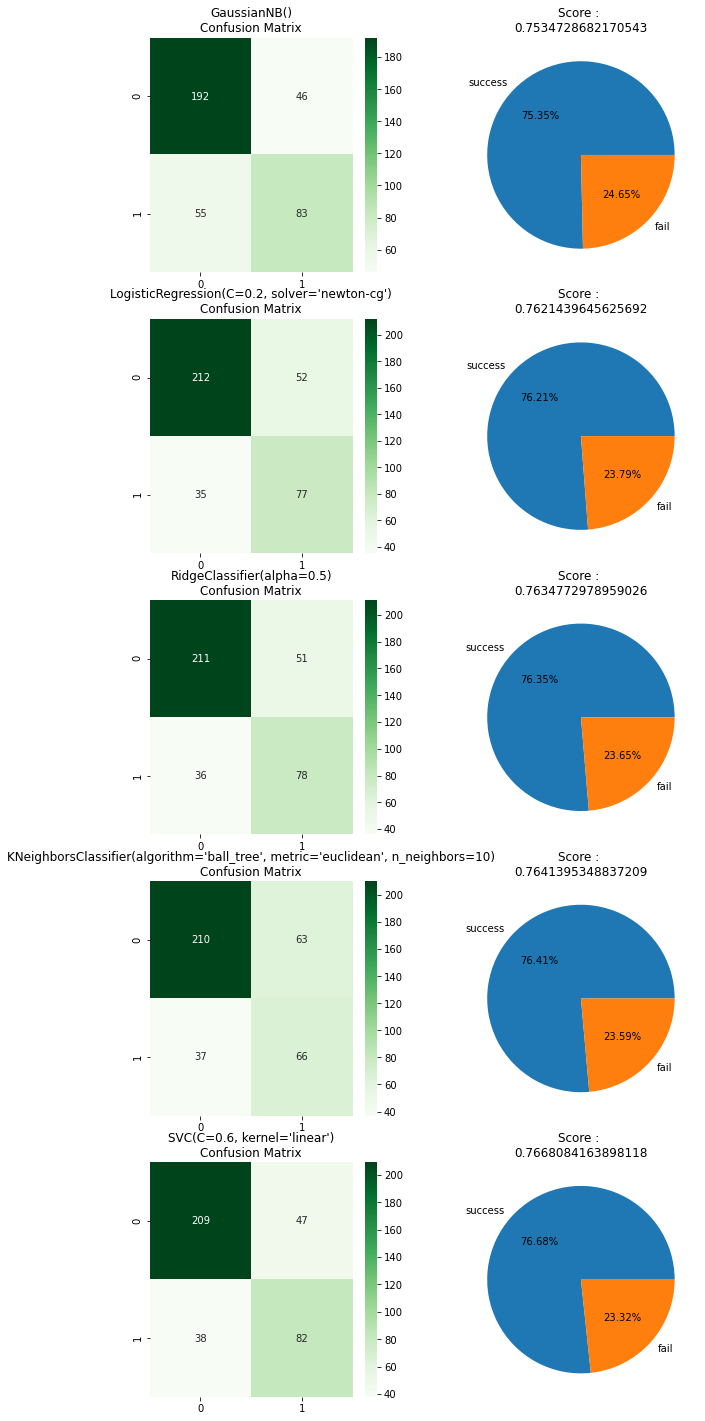

In [464]:
cannabis_corr = df_corr['Cannabis consumption'].apply(abs).sort_values(ascending=False)
cols = cannabis_corr.index[cannabis_corr.index.map(lambda x : x not in drugs)][1:10]
X, y = df[cols], Y_drugs['Cannabis consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

grids = classifiers_test(algos,X_train,y_train)
disp_scores(grids,X_test,y_test)

In [484]:
def predict_all_consumptions(algos):
    ests = {}
    for d in drugs:
        print(d)
        drug_corr = df_corr[d].apply(abs).sort_values(ascending=False)
        cols = drug_corr.index[drug_corr.index.map(lambda x : x not in drugs)][1:6]
        X,y = df[cols], Y_drugs[d]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        
        ests[d] = [cols, sorted(classifiers_test(algos,X_train,y_train), key=lambda x:x[0])[-1]]
        est = ests[d][1][1]
        print('Best estimator is',ests[d][1])
        
        fig,axes=plt.subplots(1,2, figsize=(10,5))
        
        y_pred = est.predict(X_test)
        axes[0].set_title(str(est) + '\nConfusion Matrix')
        sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.0f', cmap='Greens',ax=axes[0])
        
        score = accuracy_score(y_test,y_pred)
        axes[1].set_title('Score : \n' + str(score))
        axes[1].pie([score, 1-score], labels = ['success','fail'], autopct = '%.2f%%')
        plt.show()
        
    return ests

Alcohol consumption
KNeighborsClassifier fitted, with score : 0.9640243632336656
SVC fitted, with score : 0.9640243632336656
LogisticRegression fitted, with score : 0.9640243632336656
RidgeClassifier fitted, with score : 0.9640243632336656
GaussianNB fitted, with score : 0.9613599114064229
Best estimator is (0.9640243632336656, RidgeClassifier(alpha=0.5))


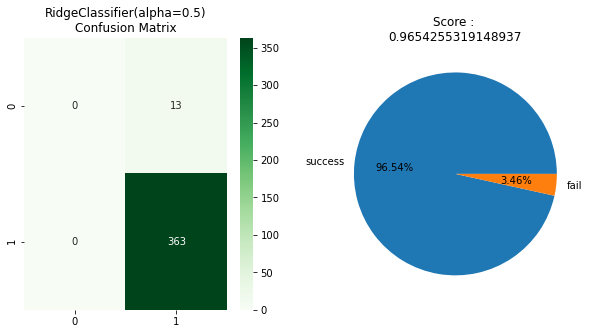

Amphetamines consumption
KNeighborsClassifier fitted, with score : 0.7055437430786268
SVC fitted, with score : 0.712861572535991
LogisticRegression fitted, with score : 0.7095304540420819
RidgeClassifier fitted, with score : 0.7055348837209303
GaussianNB fitted, with score : 0.708859357696567
Best estimator is (0.712861572535991, SVC(C=0.2, kernel='linear'))


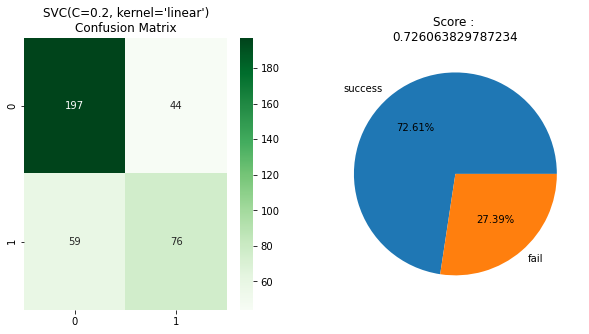

Amyl nitrite consumption
KNeighborsClassifier fitted, with score : 0.8047973421926911
SVC fitted, with score : 0.8041306755260245
LogisticRegression fitted, with score : 0.8041306755260245
RidgeClassifier fitted, with score : 0.8041306755260245
GaussianNB fitted, with score : 0.7921328903654484
Best estimator is (0.8047973421926911, KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=12))


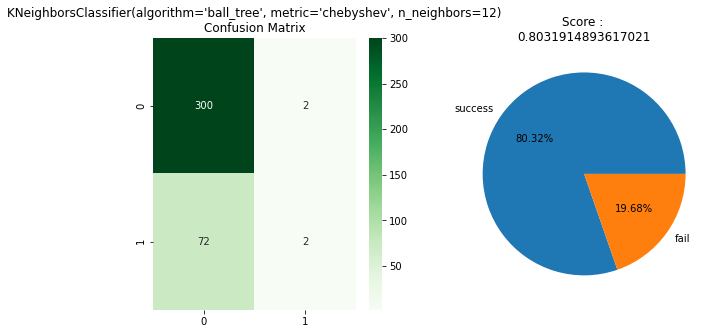

Benzodiazepine consumption
KNeighborsClassifier fitted, with score : 0.6582126245847176
SVC fitted, with score : 0.6588792912513843
LogisticRegression fitted, with score : 0.6588815060908084
RidgeClassifier fitted, with score : 0.6582148394241417
GaussianNB fitted, with score : 0.6561949058693244
Best estimator is (0.6588815060908084, LogisticRegression(C=0.1, solver='newton-cg'))


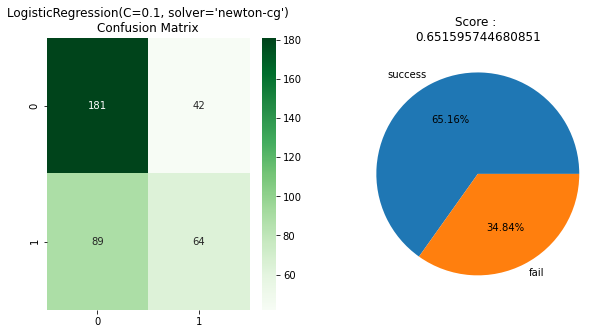

Caffeine consumption
KNeighborsClassifier fitted, with score : 0.9800132890365448
SVC fitted, with score : 0.9800132890365448
LogisticRegression fitted, with score : 0.9800132890365448
RidgeClassifier fitted, with score : 0.9800132890365448
GaussianNB fitted, with score : 0.9666888150609081
Best estimator is (0.9800132890365448, RidgeClassifier(alpha=0.5))


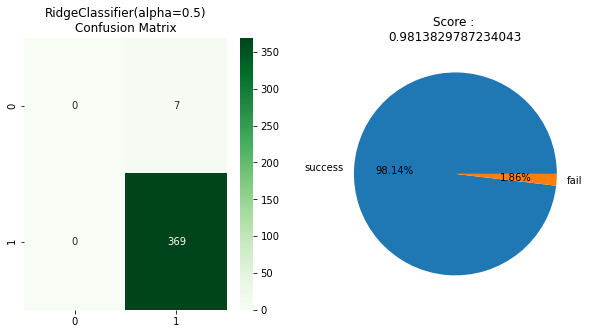

Cannabis consumption
KNeighborsClassifier fitted, with score : 0.7887995570321152
SVC fitted, with score : 0.790124031007752
LogisticRegression fitted, with score : 0.7914551495016612
RidgeClassifier fitted, with score : 0.7867906976744186
GaussianNB fitted, with score : 0.7768084163898117
Best estimator is (0.7914551495016612, LogisticRegression(C=0.5, solver='liblinear'))


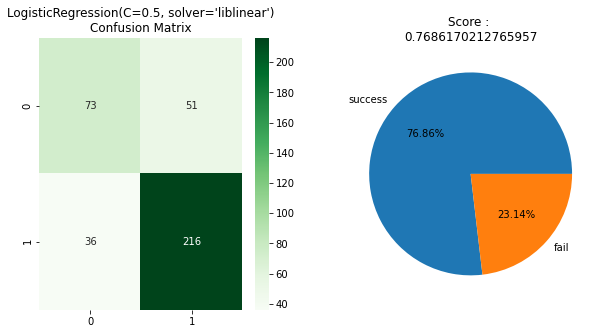

Chocolate consumption
KNeighborsClassifier fitted, with score : 0.9820132890365448
SVC fitted, with score : 0.9820132890365448
LogisticRegression fitted, with score : 0.9820132890365448
RidgeClassifier fitted, with score : 0.9820132890365448
GaussianNB fitted, with score : 0.9820132890365448
Best estimator is (0.9820132890365448, GaussianNB())


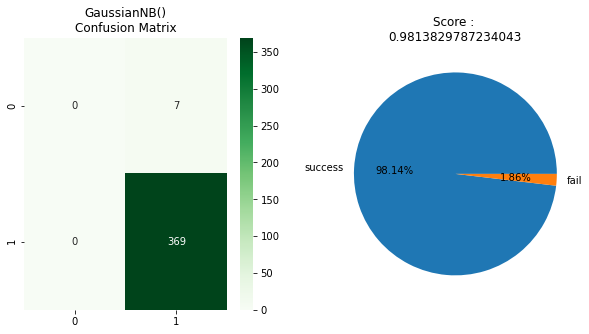

Cocaine consumption
KNeighborsClassifier fitted, with score : 0.6715526024363234
SVC fitted, with score : 0.6895370985603544
LogisticRegression fitted, with score : 0.678890365448505
RidgeClassifier fitted, with score : 0.678890365448505
GaussianNB fitted, with score : 0.6748947951273532
Best estimator is (0.6895370985603544, SVC(C=0.2, kernel='linear'))


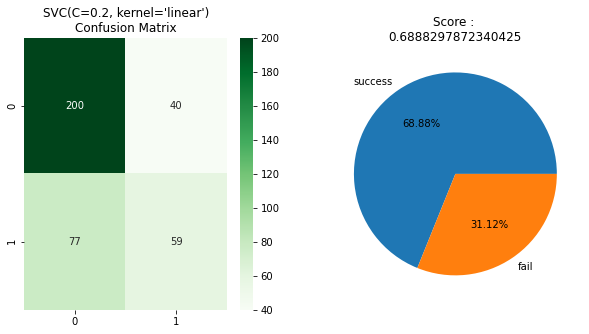

Crack consumption
KNeighborsClassifier fitted, with score : 0.9007331118493909
SVC fitted, with score : 0.9007331118493909
LogisticRegression fitted, with score : 0.9013997785160577
RidgeClassifier fitted, with score : 0.9000664451827243
GaussianNB fitted, with score : 0.8834108527131782
Best estimator is (0.9013997785160577, LogisticRegression(C=0.4, solver='liblinear'))


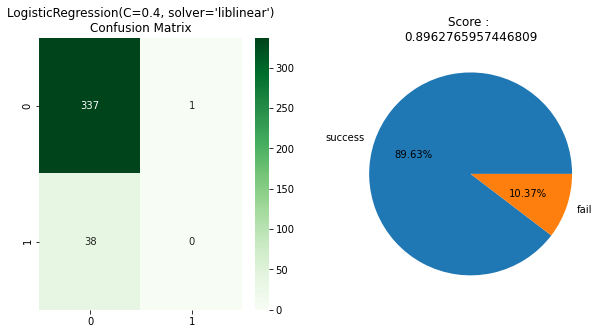

Ecstasy consumption
KNeighborsClassifier fitted, with score : 0.7235038759689922
SVC fitted, with score : 0.72415503875969
LogisticRegression fitted, with score : 0.721499446290144
RidgeClassifier fitted, with score : 0.7195038759689922
GaussianNB fitted, with score : 0.7254950166112957
Best estimator is (0.7254950166112957, GaussianNB())


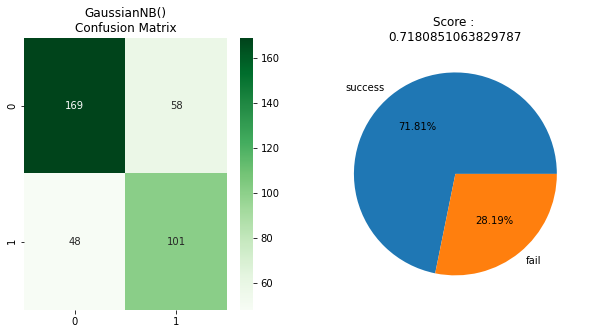

Heroin consumption
KNeighborsClassifier fitted, with score : 0.8914064230343299
SVC fitted, with score : 0.8900730897009966
LogisticRegression fitted, with score : 0.8907397563676633
RidgeClassifier fitted, with score : 0.8887419712070876
GaussianNB fitted, with score : 0.8614019933554816
Best estimator is (0.8914064230343299, KNeighborsClassifier(algorithm='kd_tree', metric='chebyshev', n_neighbors=12))


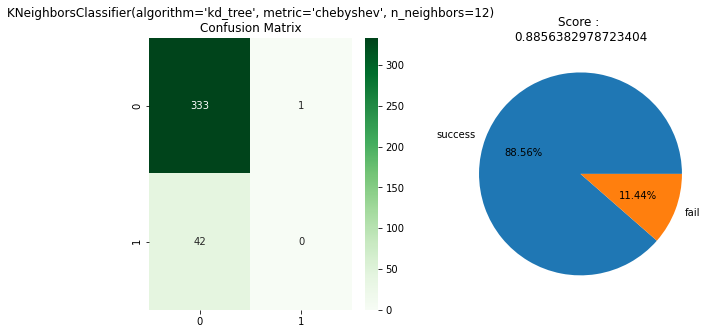

Ketamine consumption
KNeighborsClassifier fitted, with score : 0.8154662236987817
SVC fitted, with score : 0.8154573643410853
LogisticRegression fitted, with score : 0.8134595791805094
RidgeClassifier fitted, with score : 0.8154573643410853
GaussianNB fitted, with score : 0.7788372093023257
Best estimator is (0.8154662236987817, KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=14))


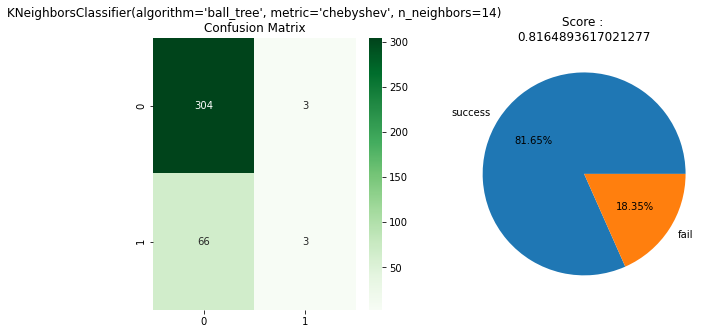

Legal highs consumption
KNeighborsClassifier fitted, with score : 0.8014551495016612
SVC fitted, with score : 0.7974595791805094
LogisticRegression fitted, with score : 0.7961284606866001
RidgeClassifier fitted, with score : 0.7967929125138428
GaussianNB fitted, with score : 0.7887995570321151
Best estimator is (0.8014551495016612, KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19))


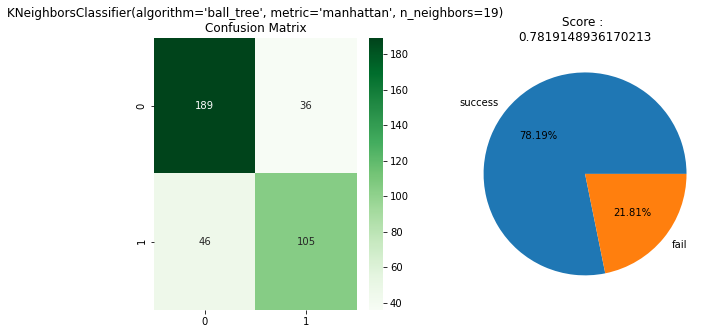

Lysergic acid diethylamide consumption
KNeighborsClassifier fitted, with score : 0.7768172757475084
SVC fitted, with score : 0.7794795127353267
LogisticRegression fitted, with score : 0.7781506090808417
RidgeClassifier fitted, with score : 0.7801483942414175
GaussianNB fitted, with score : 0.773486157253599
Best estimator is (0.7801483942414175, RidgeClassifier(alpha=0.5, solver='lsqr'))


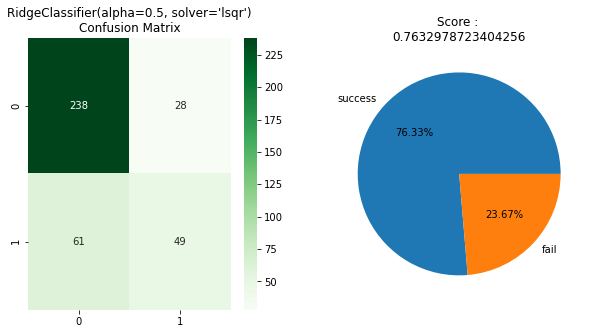

Methadone consumption
KNeighborsClassifier fitted, with score : 0.778139534883721
SVC fitted, with score : 0.7814817275747508
LogisticRegression fitted, with score : 0.7841373200442968
RidgeClassifier fitted, with score : 0.7801439645625692
GaussianNB fitted, with score : 0.7514950166112956
Best estimator is (0.7841373200442968, LogisticRegression(C=0.4, solver='newton-cg'))


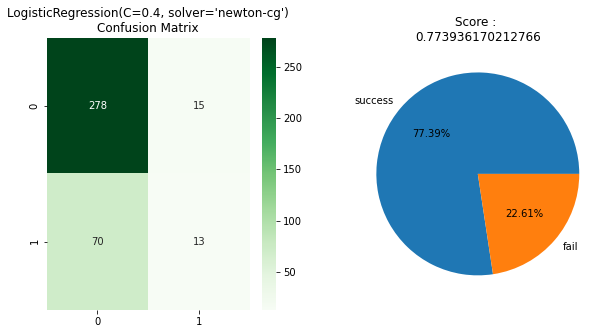

Magic mushrooms consumption
KNeighborsClassifier fitted, with score : 0.7215326688815061
SVC fitted, with score : 0.7381949058693245
LogisticRegression fitted, with score : 0.7315260243632337
RidgeClassifier fitted, with score : 0.7295326688815061
GaussianNB fitted, with score : 0.7328549280177187
Best estimator is (0.7381949058693245, SVC(C=0.30000000000000004))


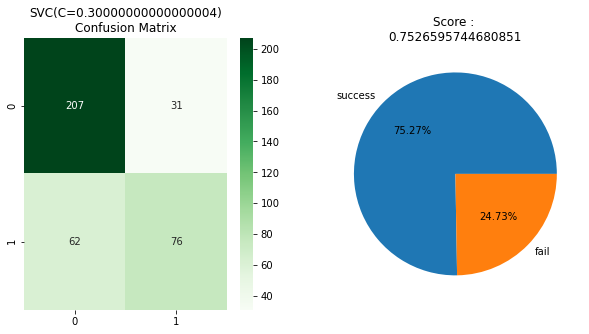

Nicotine consumption
KNeighborsClassifier fitted, with score : 0.7081838316722038
SVC fitted, with score : 0.7161860465116279
LogisticRegression fitted, with score : 0.7201794019933555
RidgeClassifier fitted, with score : 0.7195127353266889
GaussianNB fitted, with score : 0.6968682170542635
Best estimator is (0.7201794019933555, LogisticRegression(C=0.2, solver='newton-cg'))


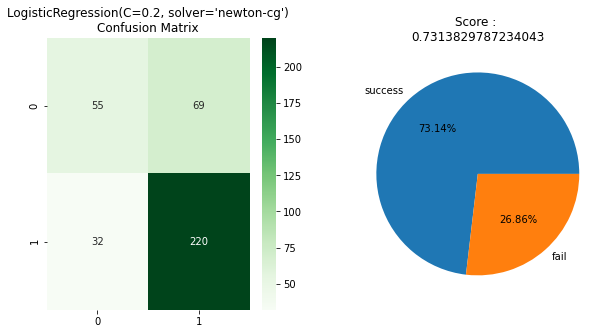

Volatile substance abuse consumption
KNeighborsClassifier fitted, with score : 0.8800797342192691
SVC fitted, with score : 0.8794152823920266
LogisticRegression fitted, with score : 0.8800797342192691
RidgeClassifier fitted, with score : 0.8794152823920266
GaussianNB fitted, with score : 0.8141218161683279
Best estimator is (0.8800797342192691, LogisticRegression(C=0.2, solver='liblinear'))


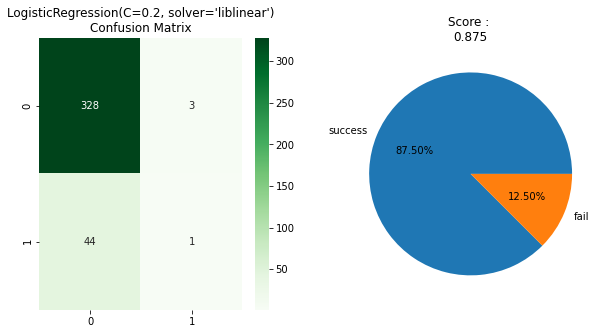

In [485]:
ests = predict_all_consumptions(algos)

As we can see, the predictions are not perfects. When we have like 97% success, in fact the algorithm was in over-fitting and put all the predictions to class 0, and as there are only 3% of the test set having class 1, here are our 3% errors.

In [483]:
df.columns.drop(drugs)

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness to experience', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation seeking'],
      dtype='object')